In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!%cd /content/drive/MyDrive/
!mkdir "Finding-Product-Variations"

/bin/bash: line 0: fg: no job control


In [3]:
%cd /content/drive/MyDrive/Finding-Product-Variations

[Errno 2] No such file or directory: '/content/drive/MyDrive/Finding-Product-Variations'
/content


In [10]:
!wget https://www.boysnextdoor-apparel.co/collections/all/products.json?page=1 -O products.json

--2023-05-06 19:11:01--  https://www.boysnextdoor-apparel.co/collections/all/products.json?page=1
Resolving www.boysnextdoor-apparel.co (www.boysnextdoor-apparel.co)... 23.227.38.74
Connecting to www.boysnextdoor-apparel.co (www.boysnextdoor-apparel.co)|23.227.38.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘products.json’

products.json           [ <=>                ] 132.84K  --.-KB/s    in 0.02s   

2023-05-06 19:11:01 (5.57 MB/s) - ‘products.json’ saved [136032]



In [11]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16 
from keras.models import Model
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import json
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from random import randint

In [14]:
# Opening JSON file
products = open("products.json",encoding="utf8")
data = json.load(products)
# print('No of proudcts: ',data,'============',len(data['products']))
urls={}
for product in data['products']:
    urls[product['id']]=product['images'][0]['src']
#Reading files from urls and storing it in dict using key as id
images={}
for key,value in urls.items():
    response=requests.get(value)
    img=Image.open(BytesIO(response.content))
    img=img.resize((224,224))
    img_arr=np.asarray(img)
    # img.show('image')
    img_arr=np.expand_dims(img_arr,axis=0)
    # print(img_arr.shape)
    images[key]=img_arr
# print(images)
    # cv2.imshow('image',img_arr)
#     cv2.waitKey(0)
# cv2.destroyAllWindows()


In [18]:
#Using vgg feature extraction
#Tried both Resent and VGG but VGG had superior outputs
vgg=VGG16()
resnet=ResNet50()
print(vgg.summary())
model1=Model(inputs=vgg.inputs, outputs=vgg.layers[-2].output)
def extract_features(images):
    features={}
    for key,value in images.items():
        feature=model1.predict(value,use_multiprocessing=True)
        features[key]=feature

    print(features,"ssssssss")
    return features


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
# Extracting features from images
features=extract_features(images)

print("ffffffff",features)
ids=np.array(list(features.keys()))
np_features=np.array(list(features.values()))
print(np_features.shape)
np_features=np_features.reshape(-1,4096)
print(np_features.shape)

1/1 [==============================] - 1s 1s/step
fffffff {5751418519702: array([[1.1792309, 0.       , 0.       , ..., 0.       , 0.       ,
        2.293983 ]], dtype=float32)}
1/1 [==============================] - 1s 788ms/step
fffffff {5751418519702: array([[1.1792309, 0.       , 0.       , ..., 0.       , 0.       ,
        2.293983 ]], dtype=float32), 7728812490978: array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        2.8166087]], dtype=float32)}
1/1 [==============================] - 1s 586ms/step
fffffff {5751418519702: array([[1.1792309, 0.       , 0.       , ..., 0.       , 0.       ,
        2.293983 ]], dtype=float32), 7728812490978: array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        2.8166087]], dtype=float32), 7696930504930: array([[0.       , 0.       , 1.6667874, ..., 3.2755349, 0.       ,
        0.       ]], dtype=float32)}
1/1 [==============================] - 1s 636ms/step
fffffff {5751418519702: array([[1.1792309, 0

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

103814.1875


Text(0, 0.5, 'Sum of squared distance')

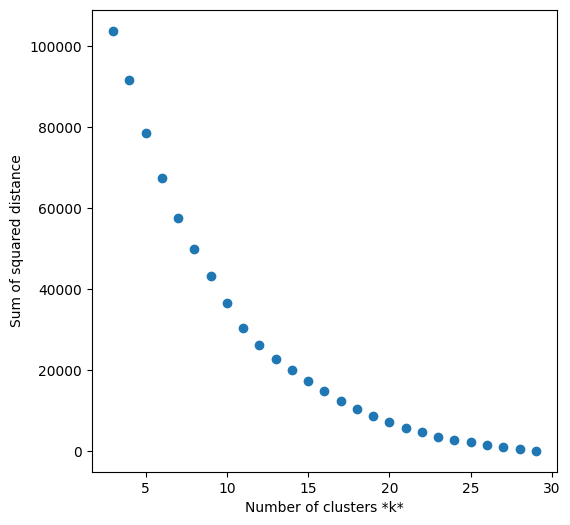

In [ ]:
#Using k means clustering with different values of k to find best of hyperparameter k
sse=[]
list_k=list(range(3,30))
print(list_k)
for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(np_features)
    
    sse.append(km.inertia_)
print(sse[0])
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse,'o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [ ]:
#Using k=16 where the sum of squared distance slope gets gentle
km = KMeans(n_clusters=16, random_state=22)
km.fit(np_features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16, random_state=22)

In [ ]:
#Grouping the ids using kmeans output
groups={}
for file, cluster in zip(ids,km.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)
print(groups)

{10: [5751418519702], 12: [7728812490978], 4: [7696930504930, 7696940531938], 11: [7767737467106], 0: [7740289188066], 1: [4355605200989, 5920661438614, 5920659472534, 5920664060054, 5920646463638], 3: [5736931852438, 5736905310358], 13: [6916467884182, 6916480925846, 6867547652246], 8: [6867479265430], 6: [7039306924182, 7039319179414], 5: [5631033213078, 5631060770966], 9: [4694288859229, 4694281060445, 4694236201053], 15: [4694274408541], 7: [4352677642333], 2: [4556781944925, 4556776538205, 4556758122589], 14: [4363810570333]}


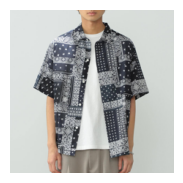

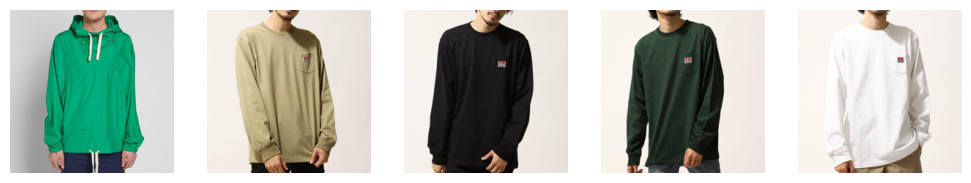

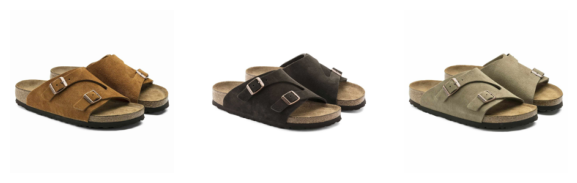

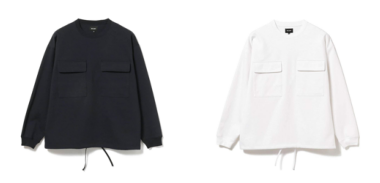

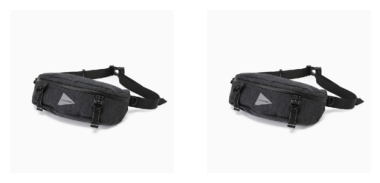

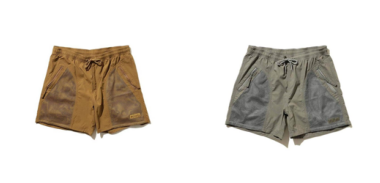

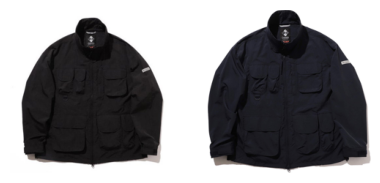

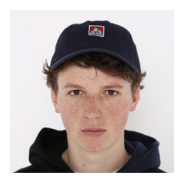

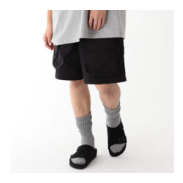

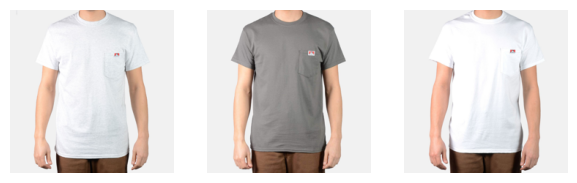

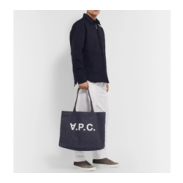

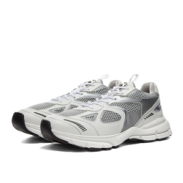

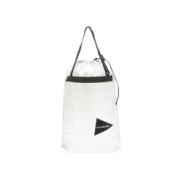

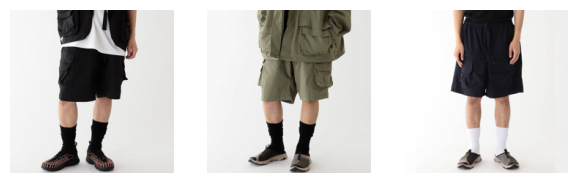

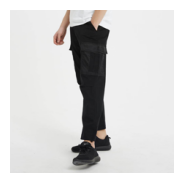

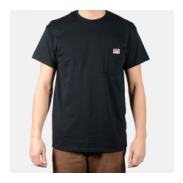

In [ ]:
#Viewing each cluster
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1)
        plt.imshow(images[file][0])
        plt.axis('off')
for i in range(16):
  view_cluster(i)

In [ ]:
handles={}
for product in data['products']:
    handles[product['id']]=product['handle']
groups_urls=[]
for key,value in groups.items():
    temp=[]
    for val in value:
        temp.append('https://www.boysnextdoor-apparel.co/products/'+handles[val])
    groups_urls.append({"product alternates":temp})
with open("output.json", "w") as outfile:
    json.dump(groups_urls, outfile)